# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

In [4]:
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Starting URL for Weather Map API Call.


weather_data=[]
record_count = 1
set_count = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through all the cities in our list
for index, city in enumerate(cities,start=1):
#     print(index,city)
    
    # group cities in lists of 25
    if (index % 25== 0 and index >=25):
        record_count+=1
        set_count+=1
        
        
    #City URL  
    city_url=url+"&q="+city.replace(" ","+")
    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    record_count+=1
    
    try:
        #needed weather info
        weather_info=requests.get(city_url).json()
        
        lat = weather_info["coord"]["lat"]
        lng=weather_info["coord"]["lon"]
        max_temps = weather_info['main']["temp_max"]
        humidity =weather_info['main']["humidity"]
        cloudiness = weather_info['clouds']["all"]
        wind_speed = weather_info['wind']["speed"]
        country=weather_info["sys"]['country']
        date=weather_info["dt"]
        
        #add info to weather_data lists
        
        weather_data.append({"City":city,
                             "Latitude":lat,
                             "Longitude":lng,
                             "Maximum Temp":max_temps,
                             "Humidity":humidity,
                             "Clouds":cloudiness,
                             "Wind Speed":wind_speed,
                             "Country":country,
                             "Date":date})
                             
#         try:
        #for rain
#         except KeyError:

#         try:
        #for snow
#         except KeyError:
        #append final data info here     
    except:
        print(f'City not found. Skipping...')
        pass
    
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | merauke
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | blyznyuky
Processing Record 5 of Set 1 | grand centre
City not found. Skipping...
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | namatanai
Processing Record 8 of Set 1 | flinders
Processing Record 9 of Set 1 | zhireken
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | yulara
Processing Record 14 of Set 1 | merrill
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | road town
Processing Record 18 of Set 1 | dunedin
Processing Record 19 of Set 1 | hokitika
Processing Record 20 of Set 1 | san carlos de bariloche
Processing Record 21 of Set 1 | kamenka
Processing Record 22 o

Processing Record 193 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 194 of Set 8 | tarakan
Processing Record 195 of Set 8 | necochea
Processing Record 196 of Set 8 | lovozero
Processing Record 197 of Set 8 | cidreira
Processing Record 198 of Set 8 | zhangye
Processing Record 199 of Set 8 | castro
Processing Record 200 of Set 8 | taoudenni
Processing Record 201 of Set 8 | lagoa
Processing Record 202 of Set 8 | meulaboh
Processing Record 203 of Set 8 | varzea da palma
Processing Record 204 of Set 8 | northam
Processing Record 205 of Set 8 | tres lagoas
Processing Record 206 of Set 8 | mayumba
Processing Record 208 of Set 9 | rio gallegos
Processing Record 209 of Set 9 | yako
Processing Record 210 of Set 9 | tura
Processing Record 211 of Set 9 | bulgan
Processing Record 212 of Set 9 | nizhneyansk
City not found. Skipping...
Processing Record 213 of Set 9 | narsaq
Processing Record 214 of Set 9 | pevek
Processing Record 215 of Set 9 | erzin
Processing Record 216 of Set 

Processing Record 385 of Set 15 | atlantic city
Processing Record 386 of Set 15 | goderich
Processing Record 387 of Set 15 | dondaicha
Processing Record 388 of Set 15 | skovorodino
Processing Record 390 of Set 16 | swellendam
Processing Record 391 of Set 16 | akureyri
Processing Record 392 of Set 16 | burgeo
Processing Record 393 of Set 16 | bud
Processing Record 394 of Set 16 | menomonie
Processing Record 395 of Set 16 | puerto del rosario
Processing Record 396 of Set 16 | bilma
Processing Record 397 of Set 16 | bambous virieux
Processing Record 398 of Set 16 | toamasina
Processing Record 399 of Set 16 | tasiilaq
Processing Record 400 of Set 16 | port hedland
Processing Record 401 of Set 16 | atambua
Processing Record 402 of Set 16 | nemuro
Processing Record 403 of Set 16 | mnogovershinnyy
Processing Record 404 of Set 16 | panorama
Processing Record 405 of Set 16 | jiblah
Processing Record 406 of Set 16 | ailigandi
Processing Record 407 of Set 16 | denia
Processing Record 408 of Set 1

Processing Record 576 of Set 23 | harbour breton
Processing Record 577 of Set 23 | naberera
Processing Record 578 of Set 23 | kalmunai
Processing Record 579 of Set 23 | arenapolis
Processing Record 580 of Set 23 | isangel
Processing Record 581 of Set 23 | namibe
Processing Record 582 of Set 23 | tazovskiy
Processing Record 583 of Set 23 | chenghai
Processing Record 584 of Set 23 | pochutla
Processing Record 585 of Set 23 | saint-augustin
Processing Record 586 of Set 23 | louisbourg
City not found. Skipping...
Processing Record 587 of Set 23 | osoyoos
Processing Record 588 of Set 23 | iwanai
Processing Record 589 of Set 23 | kambove
Processing Record 590 of Set 23 | burns lake
Processing Record 591 of Set 23 | helong
Processing Record 592 of Set 23 | kozhevnikovo
Processing Record 593 of Set 23 | vilcun
Processing Record 594 of Set 23 | rorvik
Processing Record 595 of Set 23 | grahamstown
Processing Record 596 of Set 23 | samalaeulu
City not found. Skipping...
Processing Record 598 of S

In [16]:
weather_info

{'coord': {'lon': 112.61, 'lat': 26.89},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 88.12,
  'feels_like': 93.7,
  'temp_min': 88.12,
  'temp_max': 88.12,
  'pressure': 1005,
  'humidity': 63,
  'sea_level': 1005,
  'grnd_level': 996},
 'visibility': 10000,
 'wind': {'speed': 7.36, 'deg': 209},
 'clouds': {'all': 100},
 'dt': 1596850293,
 'sys': {'country': 'CN', 'sunrise': 1596837459, 'sunset': 1596885169},
 'timezone': 28800,
 'id': 1808370,
 'name': 'Hengyang',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_df=pd.DataFrame(weather_data)

weather_df

,City,Latitude,Longitude,Maximum Temp,Humidity,Clouds,Wind Speed,Country,Date
0,bluff,-46.60,168.33,46.99,88,95,10.00,NZ,1596850550
1,merauke,-8.47,140.33,80.22,82,90,9.93,ID,1596850550
2,rikitea,-23.12,-134.97,70.07,74,0,18.95,PF,1596850550
3,blyznyuky,48.86,36.56,64.60,89,0,9.62,UA,1596850550
4,saldanha,-33.01,17.94,42.80,75,99,2.24,ZA,1596850550
...,...,...,...,...,...,...,...,...,...
554,sao caetano de odivelas,-0.75,-48.02,76.84,86,10,7.18,BR,1596850579
555,tupiza,-21.45,-65.72,48.11,65,0,4.63,BO,1596850579
556,garh maharaja,30.83,71.91,94.17,49,73,8.14,PK,1596850579
557,calvinia,-31.47,19.78,48.22,44,100,15.95,ZA,1596850579


In [18]:
#save as csv
weather_df.to_csv("City Weather Data", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# weather_df.drop(weather_df.index[weather_df["Humidity"]>100], inplace = True)
# weather_df
if city in weather_df['City']:
    weather_df["Humidity"]>100
    print({City})
else:
    print("No cities found with humidity above 100")


No cities found with humidity above 100


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

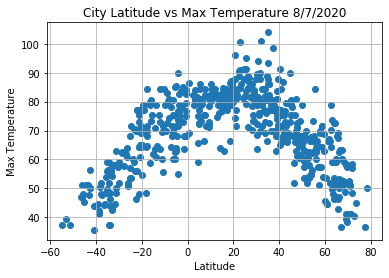

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(weather_df["Latitude"],weather_df["Maximum Temp"],marker="o",)
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.title("City Latitude vs Max Temperature 8/7/2020")
plt.grid(True)
plt.show()
plt.savefig('lat_temp_plot.png')

## Latitude vs. Humidity Plot

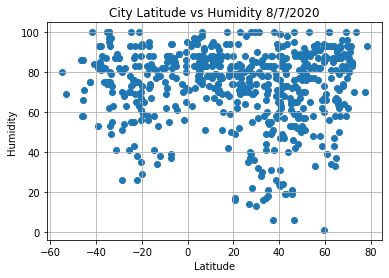

In [113]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],marker="o")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("City Latitude vs Humidity 8/7/2020")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

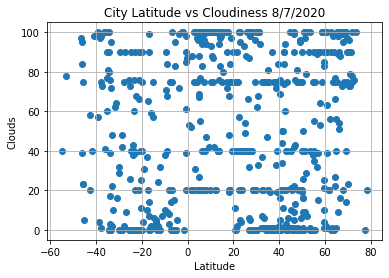

In [114]:
plt.scatter(weather_df["Latitude"],weather_df["Clouds"],marker="o")
plt.ylabel("Clouds")
plt.xlabel("Latitude")
plt.title("City Latitude vs Cloudiness 8/7/2020")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

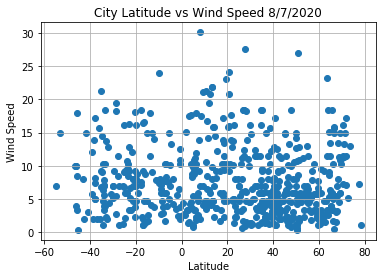

In [115]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],marker="o")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("City Latitude vs Wind Speed 8/7/2020")
plt.grid(True)
plt.show()

## Linear Regression

In [ ]:
# # OPTIONAL: Create a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept
# print(regress_values)

In [140]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (greater than or equal to 0 degrees latitude)
northern=weather_df.loc[weather_df["Latitude"]>0]

#Southern Hemisphere (less than 0 degrees latitude):
southern=weather_df.loc[weather_df["Latitude"]<0]

northern


,City,Latitude,Longitude,Maximum Temp,Humidity,Clouds,Wind Speed,Country,Date
0,stephenville crossing,48.50,-58.43,66.20,88,75,8.05,CA,1596845946
1,severo-kurilsk,50.68,156.12,52.21,92,100,26.91,RU,1596845946
2,ubinskoye,55.31,79.68,59.32,93,35,6.53,RU,1596845946
3,chokurdakh,70.63,147.92,50.59,86,96,11.52,RU,1596845946
4,hurghada,27.26,33.81,89.60,40,5,18.34,EG,1596845946
...,...,...,...,...,...,...,...,...,...
586,orange cove,36.62,-119.31,93.00,31,1,6.02,US,1596845978
587,barraute,48.43,-77.63,78.80,44,20,5.82,CA,1596845978
588,vyazma,55.21,34.30,56.61,93,55,4.34,RU,1596845978
589,obala,4.17,11.53,68.00,94,20,4.59,CM,1596845978


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      67.032700
1      66.112128
2      64.156969
3      57.687630
4      76.001940
         ...    
586    72.049393
587    67.062259
588    64.199197
589    85.752399
590    62.438287
Name: Latitude, Length: 426, dtype: float64
y = -0.42x +87.51
The r-value is: 0.4539014491092576


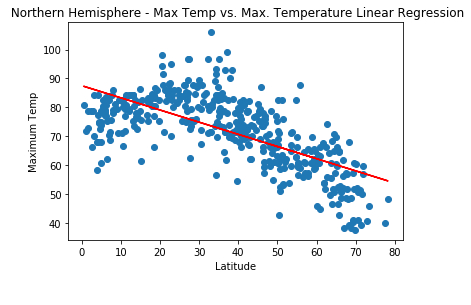

In [183]:
# x_values=northern["Latitude"]
# y_values=northern["Maximum Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern['Latitude'],northern["Maximum Temp"])

# Get regression values
regress_values = northern['Latitude'] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(northern['Latitude'],northern["Maximum Temp"])
plt.plot(northern['Latitude'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp')
plt.title(' Northern Hemisphere - Max Temp vs. Max. Temperature Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

5      38.159003
8      63.781795
9      57.199864
12     54.326495
13     76.164101
         ...    
572    61.107646
577    72.432552
578    64.839195
580    50.610270
585    69.015158
Name: Latitude, Length: 165, dtype: float64
y = 0.77x +80.15
The r-value is: 0.6554346927672288


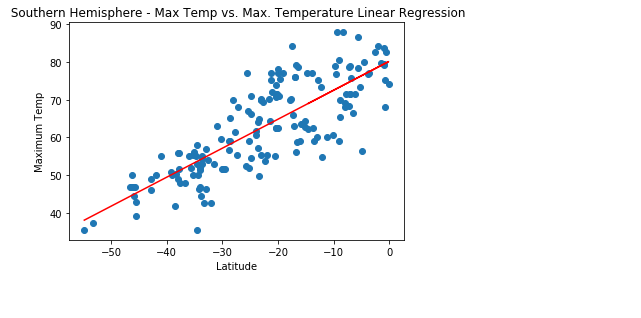

In [184]:
# x_values=southern["Latitude"]
# y_values=southern["Maximum Temp"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern['Latitude'],southern["Maximum Temp"])

# Get regression values
regress_values = southern['Latitude'] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(southern['Latitude'],southern["Maximum Temp"])
plt.plot(southern['Latitude'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp')
plt.title(' Southern Hemisphere - Max Temp vs. Max. Temperature Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      71.810374
1      71.674386
2      71.385567
3      70.429906
4      73.135324
         ...    
586    72.551448
587    71.814741
588    71.391805
589    74.575677
590    71.131680
Name: Latitude, Length: 426, dtype: float64
The r-value is: 0.00388598398243825


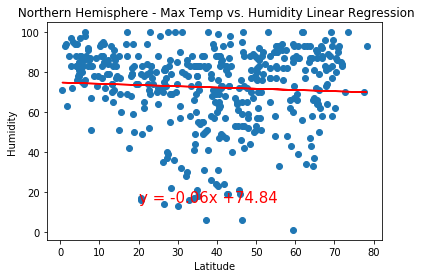

In [176]:
# x_values=northern["Latitude"]
# y_values=northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern['Latitude'],northern["Humidity"])

# Get regression values
regress_values = northern['Latitude'] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern['Latitude'],northern["Humidity"])
plt.plot(northern['Latitude'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(' Northern Hemisphere - Max Temp vs. Humidity Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

5      76.720592
8      74.509874
9      75.077759
12     75.325671
13     73.441536
         ...    
572    74.740598
577    73.763492
578    74.418642
580    75.646305
585    74.058343
Name: Latitude, Length: 165, dtype: float64
The r-value is: 0.002572931587747396


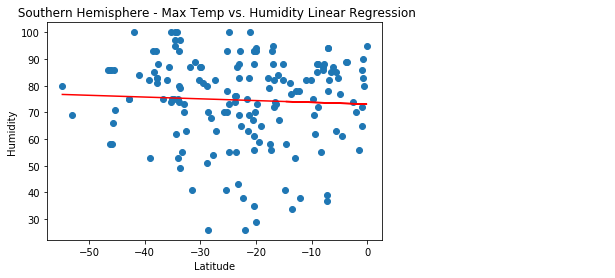

In [191]:
# x_values=southern["Latitude"]
# y_values=southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern['Latitude'],southern["Humidity"])


# Get regression values
regress_values = southern['Latitude'] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern['Latitude'],southern["Humidity"])
plt.plot(southern['Latitude'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(' Southern Hemisphere - Max Temp vs. Humidity Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      48.689947
1      48.241182
2      47.288072
3      44.134369
4      53.062313
         ...    
586    51.135507
587    48.704356
588    47.308658
589    57.815511
590    46.450241
Name: Latitude, Length: 426, dtype: float64
The r-value is: 0.011469338348172025


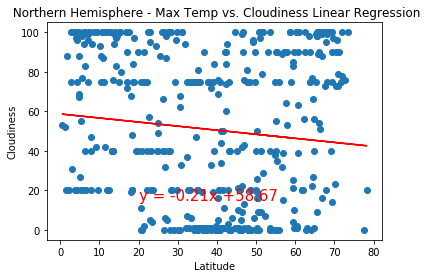

In [192]:
# x_values=northern["Latitude"]
# y_values=northern["Cloud"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern['Latitude'],northern["Clouds"])

# Get regression values
regress_values = northern['Latitude'] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern['Latitude'],northern["Clouds"])
plt.plot(northern['Latitude'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(' Northern Hemisphere - Max Temp vs. Cloudiness Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

5      52.506539
8      42.456969
9      45.038482
12     46.165452
13     37.600478
         ...    
572    43.505802
577    39.064036
578    42.042243
580    47.623001
585    40.404380
Name: Latitude, Length: 165, dtype: float64
The r-value is: 0.011342236220801896


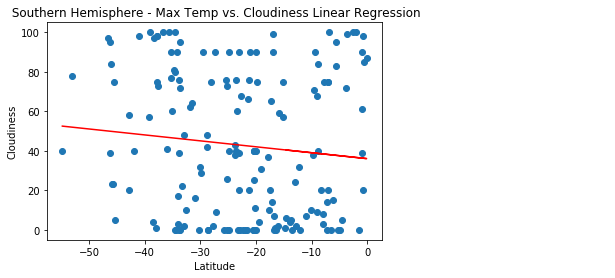

In [193]:
# x_values=southern["Latitude"]
# y_values=southern["Cloud"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern['Latitude'],southern["Clouds"])

# Get regression values
regress_values = southern['Latitude'] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern['Latitude'],southern["Clouds"])
plt.plot(southern['Latitude'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(' Southern Hemisphere - Max Temp vs. Cloudiness Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      7.137193
1      7.071052
2      6.930578
3      6.465771
4      7.781612
         ...   
586    7.497631
587    7.139317
588    6.933612
589    8.482160
590    6.807095
Name: Latitude, Length: 426, dtype: float64
The r-value is: 0.012858284857729675


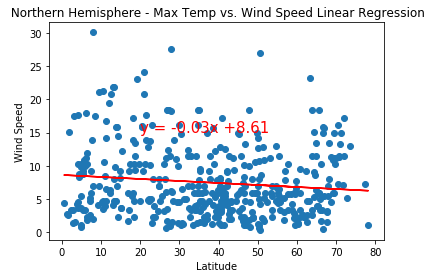

In [194]:
# x_values=northern["Latitude"]
# y_values=northern["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern['Latitude'],northern["Wind Speed"])

# Get regression values
regress_values = northern['Latitude'] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern['Latitude'],northern["Wind Speed"])
plt.plot(northern['Latitude'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(' Northern Hemisphere - Max Temp vs. Wind Speed Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

5      8.747623
8      7.850392
9      8.080871
12     8.181487
13     7.416801
         ...   
572    7.944032
577    7.547469
578    7.813365
580    8.311618
585    7.667135
Name: Latitude, Length: 165, dtype: float64
The r-value is: 0.0050954562937306465


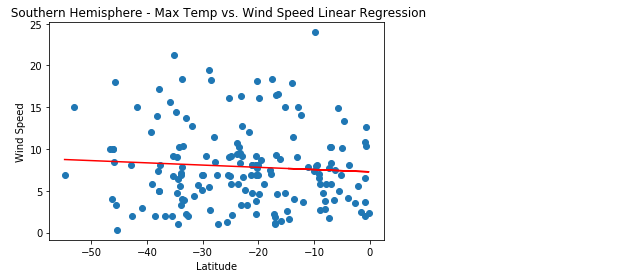

In [195]:
# x_values=southern["Latitude"]
# y_values=southern["Cloud"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern['Latitude'],southern["Wind Speed"])

# Get regression values
regress_values = southern['Latitude'] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern['Latitude'],southern["Wind Speed"])
plt.plot(southern['Latitude'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(' Southern Hemisphere - Max Temp vs. Wind Speed Linear Regression')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()